In [1]:
import numpy as np
import sys as sys
import os as os
import yaml as yaml
from geocluster.geocluster import GeoCluster
from graph_library.graph_library import GraphGen
import networkx as nx

#create a folder and move into it
folder = '/data/AG/geocluster/SBM'
if not os.path.isdir(folder):
    os.mkdir(folder)
os.chdir(folder)

G = GraphGen(whichgraph='SBM', paramsfile='/home/gosztolai/Dropbox/github/geometric_clustering/benchmark/graph_params.yaml')
G.outfolder = folder
G.params['seed'] = 0
G.generate()
        
# initialise the code with parameters and graph 
graph = nx.read_gpickle("SBM_0_.gpickle")
graph.graph['name'] = 'SBM'
pos = nx.get_node_attributes(graph, 'pos') 

# initialise the code with parameters and graph
T = np.logspace(G.params['t_min'], G.params['t_max'], G.params['n_t'])
gc = GeoCluster(graph, T=T, cutoff=1., use_spectral_gap = False)
                 
#Compute the OR curvatures are all the times
gc.compute_OR_curvatures()
gc.pos = [pos[i] for i in range(len(pos))]

#Save results for later analysis
gc.save_curvature()


Graph: SBM

Parameters: {'sizes': [20, 15], 'probs': [[10.0, 0.5], [0.5, 10.0]], 'seed': 0, 't_min': -1.5, 't_max': 2.0, 'n_t': 25, 'similarity': None}

Graph: SBM

Construct normalized Laplacian

Compute geodesic distance matrix

Compute measures


/home/gosztolai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
100%|██████████| 35/35 [00:00<00:00, 95.55it/s]


Compute edge curvatures



100%|██████████| 152/152 [00:03<00:00, 44.11it/s]


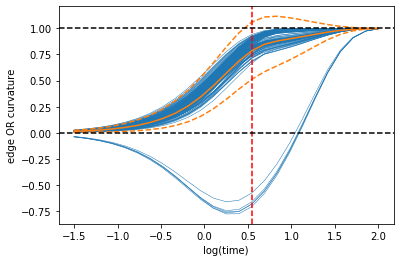

In [4]:
gc.figsize=(5,2)
gc.plot_edge_curvature()
#plt.axis([1e-3,1e2,-1,1])

In [12]:
# compute all neighbourhood densities
import scipy as sc
import pylab as plt
import networkx as nx
def mx_comp(L, T, cutoff, i):
    N = np.shape(L)[0]

    def delta(i, n):
        p0 = np.zeros(n)
        p0[i] = 1.
        return p0


    mx_all = [] 
    Nx_all = []

    mx_tmp = delta(i, N) #set initial condition
    T = [0,] + list(T) #add time 0
    for i in range(len((T))-1): 
        #compute exponential by increments (faster than from 0)
        mx_tmp = sc.sparse.linalg.expm_multiply(-(T[i+1]-T[i])*L, mx_tmp)

        Nx = np.argwhere(mx_tmp >= (1-cutoff)*np.max(mx_tmp))
        mx_all.append(sc.sparse.lil_matrix(mx_tmp[Nx]/np.sum(mx_tmp[Nx])))
        Nx_all.append(Nx)

    return mx_all, Nx_all


def plot_measure_graph(self, t,mx1, mx2,  node_size  = 100, edge_width = 1):

        """
        plot the curvature on the graph for a given time t
        """

        plt.figure(figsize = self.figsize)

        edge_vmin = -np.max(abs(self.Kappa[:,t]))
        edge_vmax = np.max(abs(self.Kappa[:,t]))
        
        self.compute_node_curvature()

        vmin = 0# -np.max(abs(mx))
        vmax = 1#np.max(abs(mx))
        mx1 /= np.max(mx1)
        mx2 /= np.max(mx2)

        node_size1 = mx1*node_size
        node_size2 = mx2*node_size

        from matplotlib.markers import MarkerStyle
        ms1 = MarkerStyle('o', fillstyle = 'left')
        ms2 = MarkerStyle('o', fillstyle = 'right')
        node_color1 = 'C0'
        node_color2 = 'C1'

        nodes = nx.draw_networkx_nodes(self.G, pos = self.pos, node_size = node_size1, node_color = node_color1, vmin = vmin, vmax = vmax,  cmap=plt.get_cmap('viridis'),node_shape=ms1)

        edges = nx.draw_networkx_edges(self.G, pos = self.pos, width = edge_width, edge_color = '0.5', edge_vmin = edge_vmin, edge_vmax = edge_vmax, edge_cmap=plt.get_cmap('coolwarm'))

        #plt.colorbar(edges, label='Curvature')

        if self.node_labels:
            old_labels={}
            for i in self.G:
                old_labels[i] = str(i) + ' ' + self.G.node[i]['old_label']
            nx.draw_networkx_labels(self.G, pos = self.pos, labels = old_labels)
        nodes = nx.draw_networkx_nodes(self.G, pos = self.pos, node_size = node_size2, node_color = node_color2, vmin = vmin, vmax = vmax,  cmap=plt.get_cmap('viridis'),node_shape=ms2)


        limits = plt.axis('off') #turn axis odd
%matplotlib notebook

In [13]:
i = 4
j = 27
mx_1, Nx_1 = mx_comp(gc.L,gc.T,gc.cutoff, i)
mx_2, Nx_2 = mx_comp(gc.L,gc.T,gc.cutoff, j)

<IPython.core.display.Javascript object>


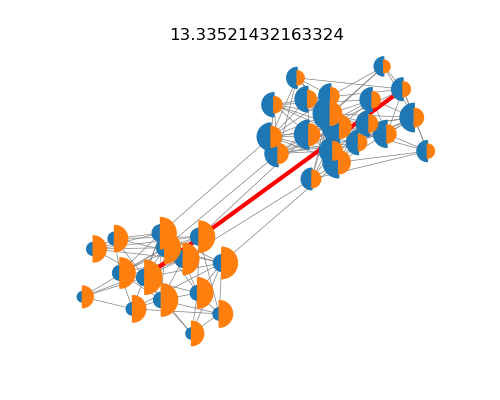

/home/gosztolai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [14]:

t = 18
mx1 = mx_1[t].toarray().flatten()
mx2 = mx_2[t].toarray().flatten()
gc.figsize=(5,4)
gc.node_labels = False
plot_measure_graph(gc, t, mx1, mx2,  node_size  = 600, edge_width = 0.5)
nx.draw_networkx_edges(gc.G, pos = gc.pos, edgelist=[(i,j),], edge_color='r',width = 3)#, edge_color = '0.5', edge_vmin = edge_vmin, edge_vmax = edge_vmax, edge_cmap=plt.get_cmap('coolwarm'))

plt.title(gc.T[t])
plt.savefig('mxs.svg', bbox_inches='tight')

<IPython.core.display.Javascript object>


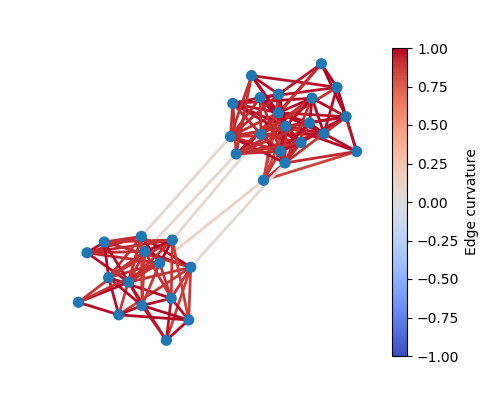

/home/gosztolai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/gosztolai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


In [16]:
gc.plot_graph(t, node_size=50, edge_width=2, node_labels=False, cluster=False)
plt.savefig('curvature.svg', bbox_inches='tight')

In [17]:
# compute all neighbourhood densities
def mx_comp(L, T, cutoff, i):
    N = np.shape(L)[0]

    def delta(i, n):
        p0 = np.zeros(n)
        p0[i] = 1.
        return p0


    mx_all = [] 
    Nx_all = []

    mx_tmp = delta(i, N) #set initial condition
    T = [0,] + list(T) #add time 0
    for i in range(len((T))-1): 
        #compute exponential by increments (faster than from 0)
        mx_tmp = sc.sparse.linalg.expm_multiply(-(T[i+1]-T[i])*L, mx_tmp)

        Nx = np.argwhere(mx_tmp >= (1-cutoff)*np.max(mx_tmp))
        mx_all.append(sc.sparse.lil_matrix(mx_tmp[Nx]/np.sum(mx_tmp[Nx])))
        Nx_all.append(Nx)

    return mx_all, Nx_all
import ot

# compute curvature for an edge ij
def zeta_comp(mx_all, dist, it, e):
    i = e[0]
    j = e[1]

    nt = len(mx_all[0][0])
    K = np.zeros(nt)

    Nx = np.array(mx_all[i][1][it]).flatten()
    Ny = np.array(mx_all[j][1][it]).flatten()
    mx = mx_all[i][0][it].toarray().flatten()
    my = mx_all[j][0][it].toarray().flatten()

    dNxNy = dist[Nx,:][:,Ny].copy(order='C')


    zeta = ot.emd(mx, my, dNxNy) 
            
        

    return zeta

In [18]:
from multiprocessing import Pool
from tqdm import tqdm
from functools import partial

with Pool(processes = gc.workers) as p_mx:  #initialise the parallel computation
    mx_all = list(tqdm(p_mx.imap(partial(mx_comp, gc.L, gc.T, gc.cutoff), gc.G.nodes()), total = gc.n))

100%|██████████| 35/35 [00:00<00:00, 97.57it/s]


<IPython.core.display.Javascript object>


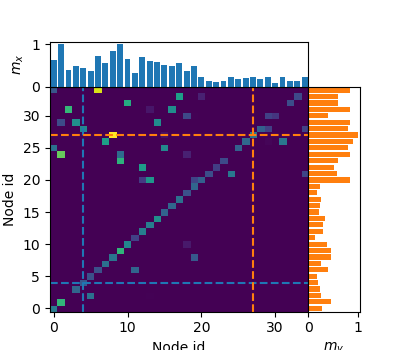

In [19]:
zeta = zeta_comp(mx_all, gc.dist, t, (i,j))
import matplotlib.gridspec as gridspec

plt.figure(figsize=(4,3.5))
gs = gridspec.GridSpec(2, 2, height_ratios = [ 0.2, 1], width_ratios = [1,0.2] )
gs.update(wspace=0.00)
gs.update(hspace=0)

ax1 = plt.subplot(gs[1, 0])


ax1.imshow((zeta.T),cmap='viridis',aspect='auto', origin='auto')
ax1.axvline(i, c='C0',ls='--')
ax1.axhline(i, c='C0',ls='--')

ax1.axvline(j, c='C1',ls='--')
ax1.axhline(j, c='C1',ls='--')
ax1.set_xlabel('Node id')
ax1.set_ylabel('Node id')

ax2 = plt.subplot(gs[0, 0])
ax2.bar(np.arange(len(mx1)), mx1,color='C0',log=False)
ax2.set_xlim(-0.5,len(mx1)-0.5)
#ax2.set_ylim(0.0,1)

#ax2.axhline(0.1,ls='--',c='k',lw=0.8)

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax2.set_ylabel('$m_x$')
ax3 = plt.subplot(gs[1, 1])
ax3.barh(np.arange(len(mx2)),mx2,color='C1',log=False)
#ax3.axvline(0.1,ls='--',c='k',lw=0.8)
ax3.set_ylim(-0.5,len(mx2)-0.5)
#ax3.set_xlim(0.01,1)
ax3.set_xlabel('$m_y$')

ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False)


#ax1.axvline(6.5,c='w',ls='--',lw=0.8)
#ax1.axvline(9,c='w',ls='--',lw=0.8)
#ax1.axhline(6.5,c='w',ls='--',lw=0.8)
#ax1.axhline(9,c='w',ls='--',lw=0.8)
#ax2.axvline(6.5,c='k',ls='--',lw=0.8)
#ax2.axvline(40,c='k',ls='--',lw=0.8)
#ax3.axhline(6.5,c='k',ls='--',lw=0.8)
#ax3.axhline(40,c='k',ls='--',lw=0.8)

plt.savefig('zeta.svg', bbox_inches='tight')

<IPython.core.display.Javascript object>


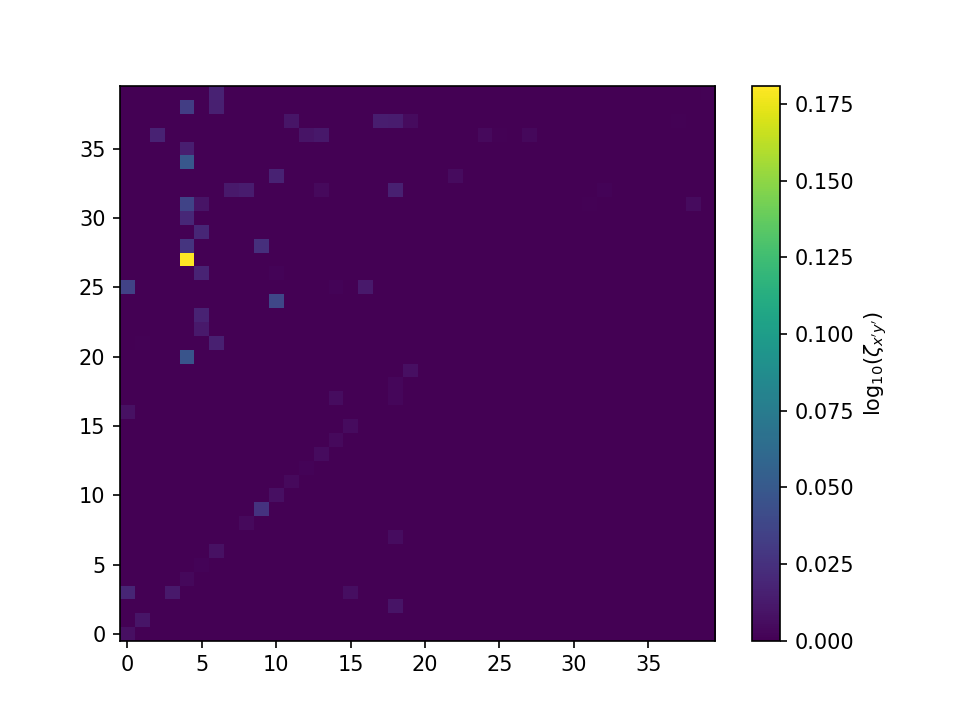

In [20]:
plt.figure()
plt.imshow((zeta.T),cmap='viridis',aspect='auto', origin='auto')
plt.colorbar(label=r'$\mathrm{log}_{10}(\zeta_{x^\prime y^\prime})$')
plt.savefig('colorbar_zeta.svg')

<IPython.core.display.Javascript object>


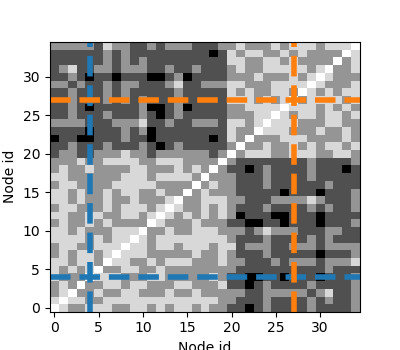

In [20]:
plt.figure(figsize=(4,3.5))
plt.imshow(gc.dist,aspect='auto', origin='auto',cmap='Greys')
ax1 = plt.gca()
ax1.axvline(i, c='C0',lw=4,ls='--')
ax1.axhline(i, c='C0',lw=4,ls='--')

ax1.axvline(j, c='C1',lw=4,ls='--')
ax1.axhline(j, c='C1',lw=4,ls='--')
ax1.set_xlabel('Node id')
ax1.set_ylabel('Node id')
plt.savefig('distance.svg', bbox_inches='tight')